<a href="https://colab.research.google.com/github/alzayerd/Tadawul-stcks/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Tadawul_stcks.csv') # reading the data 
df.head() # To display the top 5 rows

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [ ]:
df.dtypes # to check the type of data 

symbol              int64
name               object
trading_name       object
sectoer            object
date               object
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object

In [ ]:
df.shape # Total number of rows and columns

(593819, 14)

In [ ]:
df.drop('sectoer',axis=1) # dropping the sector column


,symbol,name,trading_name,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [ ]:
df.info() # to print a summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


In [ ]:
df.describe() #to calculate some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,593819.000000,587364.000000,587122.000000,587122.000000,593819.000000,593819.000000,593819.000000,5.938190e+05,5.938190e+05,586128.000000
mean,3952.684793,41.237794,41.971636,40.593406,40.961602,0.001174,0.035652,1.673422e+06,5.008553e+07,960.642348
std,2284.498530,86.713646,89.178183,84.562283,86.491709,4.782545,3.480783,5.482121e+06,1.472969e+08,3401.794136
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.200000,16.400000,16.000000,16.070000,-0.250000,-0.910000,1.484920e+05,4.114858e+06,158.000000
50%,4004.000000,26.500000,26.905000,26.100000,26.300000,0.000000,0.000000,4.335560e+05,1.210533e+07,376.000000
75%,5110.000000,46.500000,47.200000,45.850000,46.200000,0.250000,0.910000,1.271184e+06,3.561017e+07,900.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


In [ ]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows.shape ) # check the number of duplicate rows 

number of duplicate rows:  (0, 14)


In [ ]:
print(df.isnull().sum()) # finding the null values 

symbol               0
name                 0
trading_name         0
sectoer              0
date                 0
open              6455
high              6697
low               6697
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         7691
dtype: int64


In [ ]:
df = df.dropna() # dropping the missing values 
df.count()

symbol            579431
name              579431
trading_name      579431
sectoer           579431
date              579431
open              579431
high              579431
low               579431
close             579431
change            579431
perc_Change       579431
volume_traded     579431
value_traded      579431
no_trades         579431
dtype: int64

In [ ]:
print(df.isnull().sum()) # results after dropping the values

symbol            0
name              0
trading_name      0
sectoer           0
date              0
open              0
high              0
low               0
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64


### **Visualizing the data **

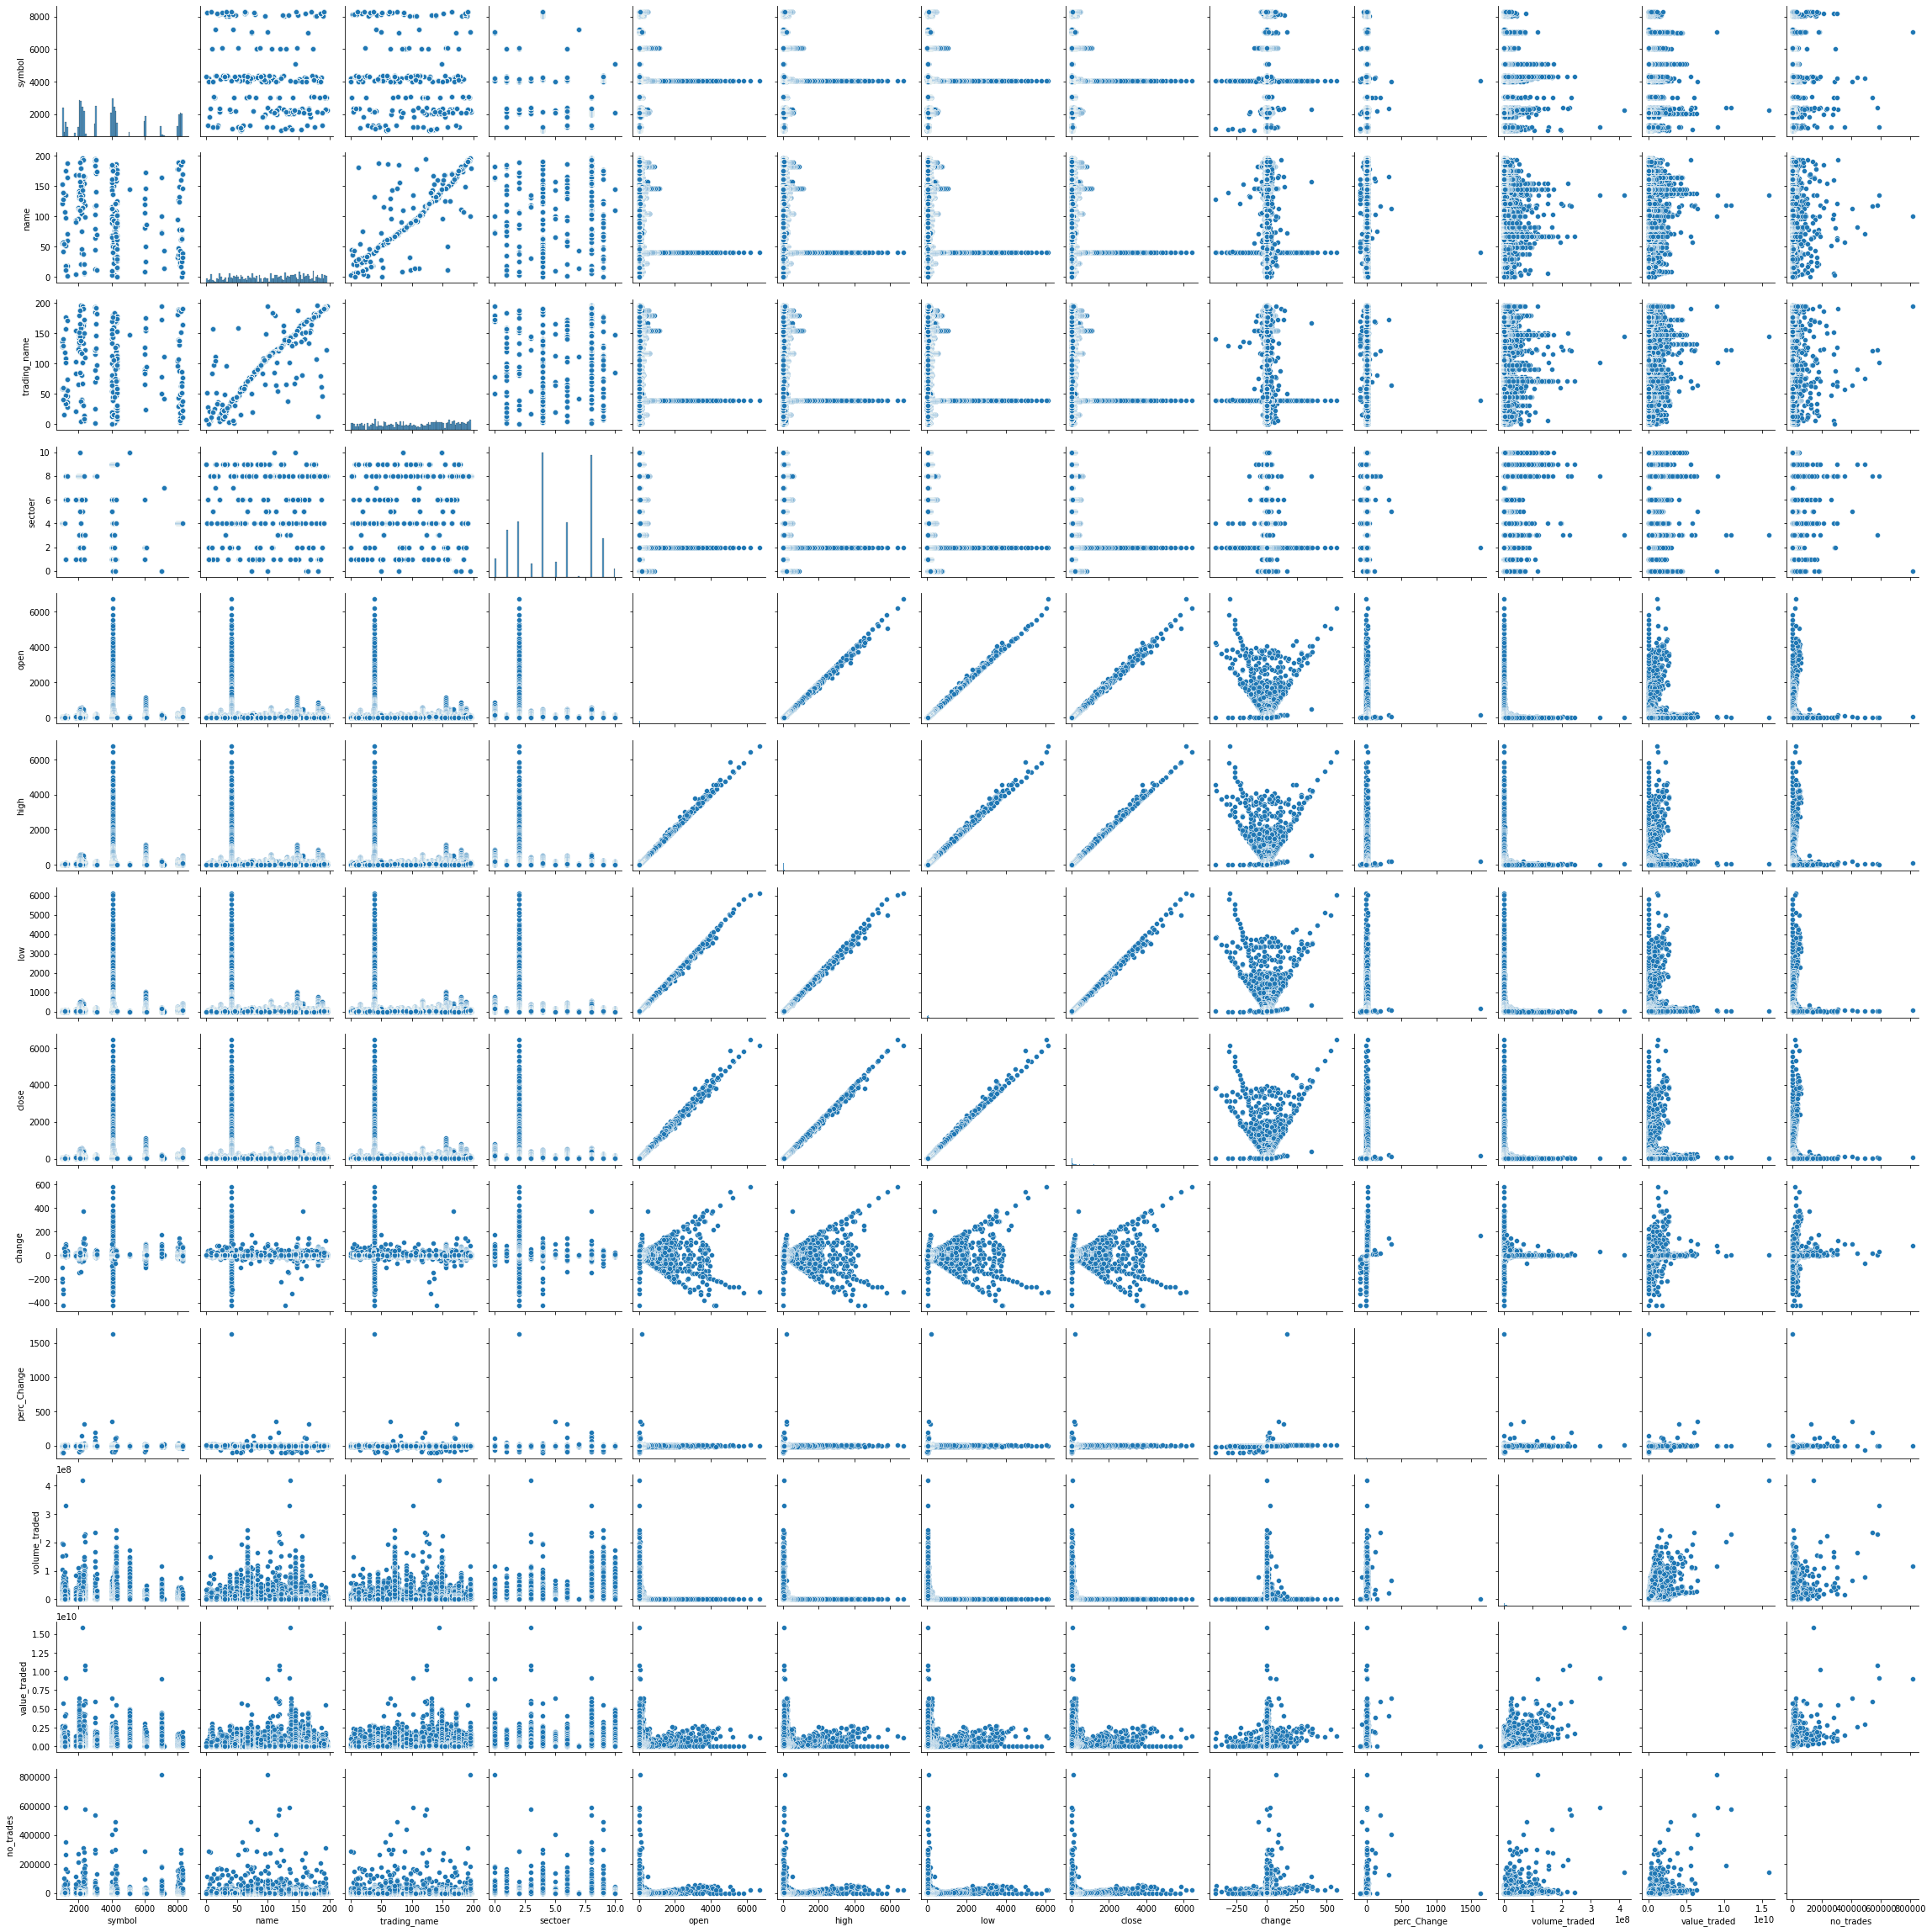

In [ ]:
sns.pairplot(df) #Plotting the numerical variables against each other

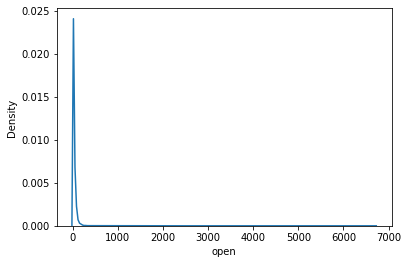

In [ ]:
sns.kdeplot(df['open']) # to visualize the kde distribution of observations in the dataset

**###Questions**

Can you compare the companies based on the total traded values?

Can you identify the dates with a very large number of trades for a specific period of time?


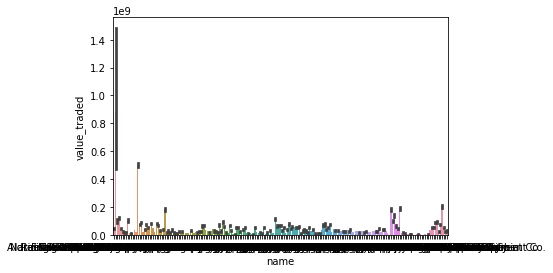

In [ ]:
sns.barplot(x = 'name',y='value_traded',data=df) # to understand and compare the companies based on the total traded values 

Text(0.5, 1.0, 'previous stock prices of Saudi stocks')

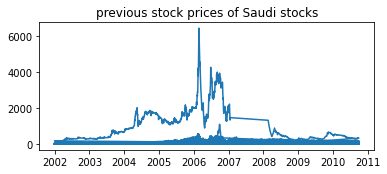

In [ ]:
start_date = pd.to_datetime('2000-03-05')
end_date = pd.to_datetime('2010-9-30')                         
df['date'] = pd.to_datetime(df['date']) 
new_df = (df['date']>= start_date) & (df['date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["close"])
plt.title('previous stock prices of Saudi stocks')

In [ ]:
df.corr() # check the values that are most correlated with the target 

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
symbol,1.000000,-0.000187,0.000470,-0.000824,-0.000393,0.001049,-0.000715,-0.017364,-0.023426,0.024447
open,-0.000187,1.000000,0.999429,0.999489,0.998964,-0.008890,-0.000235,-0.038034,0.197110,0.138067
high,0.000470,0.999429,1.000000,0.999036,0.999420,0.007595,0.004518,-0.036040,0.201976,0.142394
low,-0.000824,0.999489,0.999036,1.000000,0.999313,0.001359,0.003699,-0.039116,0.195352,0.135165
close,-0.000393,0.998964,0.999420,0.999313,1.000000,0.026114,0.009232,-0.037316,0.199868,0.138874
change,0.001049,-0.008890,0.007595,0.001359,0.026114,1.000000,0.292096,0.024720,0.096193,0.095879
perc_Change,-0.000715,-0.000235,0.004518,0.003699,0.009232,0.292096,1.000000,0.080197,0.093340,0.082033
volume_traded,-0.017364,-0.038034,-0.036040,-0.039116,-0.037316,0.024720,0.080197,1.000000,0.688813,0.469689
value_traded,-0.023426,0.197110,0.201976,0.195352,0.199868,0.096193,0.093340,0.688813,1.000000,0.601935
no_trades,0.024447,0.138067,0.142394,0.135165,0.138874,0.095879,0.082033,0.469689,0.601935,1.000000


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns # converting the objects to numerical values 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

coding = OrdinalEncoder()
df[object_columns] = coding.fit_transform(df[object_columns])
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,131.0,142.0,3.0,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,131.0,142.0,3.0,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,131.0,142.0,3.0,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,131.0,142.0,3.0,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,131.0,142.0,3.0,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


### **Splitting the dataset into training and testing data **

In [ ]:
X = df[['open','high','low']] # defining the variables x and y 
y = df['close']

In [ ]:
X.head()

,open,high,low
0,35.55,35.85,34.90
1,34.70,35.65,34.50
2,34.70,35.15,34.70
3,35.20,35.65,34.00
4,35.35,35.60,34.25


In [ ]:
y.head()

0    34.90
1    35.30
2    35.05
3    34.00
4    34.55
Name: close, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train.shape, X_test.shape

((388218, 3), (191213, 3))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr1 = LinearRegression()

In [ ]:
lr1.fit(X_train, y_train) # Fit the model to a set of training data

LinearRegression()

### **Evaluating the model **

In [ ]:
predictions = lr1.predict(X_test) #predict the target (close) based on a sample of independent variables (open,high,low)

In [ ]:
predictions

array([38.23140117, 15.72932897, 14.44681671, ..., 52.44187941,
       23.99869673, 26.14392518])

In [ ]:
# The coefficients
print('Coefficients: \n', lr1.coef_)

Coefficients: 
 [-0.60056963  0.82903122  0.76953578]


Text(0, 0.5, 'Predicted ')

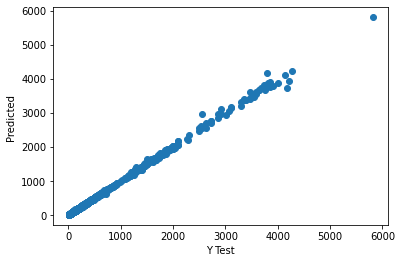

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted ')

In [ ]:
lr1.score(X_train, y_train) #Score the performance of a model on the sample of data 

0.999509225496233

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predicted = lr1.predict(X) #s used to evaluate the performance of a linear regression model.
r2_score(y, y_predicted)

0.9994141461760171

In [ ]:
adjusted_r_squared_1 = 1 - (1-(0.9994147552167887))*(len(y)-1)/(len(y)-X.shape[1]-1) # to show how well the data points fit line

In [ ]:
adjusted_r_squared_1

0.999414752186667

In [ ]:
# calculate these metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #  risk metric corresponding to the expected value of the absolute error loss
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # a risk metric corresponding to the expected value of the squared error or loss.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # measure of the differences between values predicted by the model o

MAE: 0.3639524340062466
MSE: 5.905077509021435
RMSE: 2.430036524215518


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


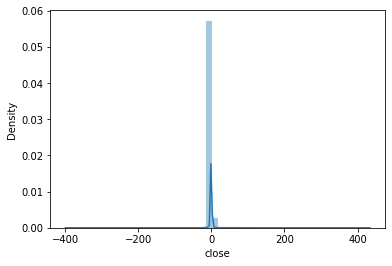

In [ ]:
#checking using the residuals which are the difference between the observed value and the mean value that the model predicts for that observation

sns.distplot((y_test-predictions),bins=50); # it is normally distributed, so everything is ok with the data 


In [ ]:
coeffecients = pd.DataFrame(lr1.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
open,-0.600570
high,0.829031
low,0.769536
